<a href="https://colab.research.google.com/github/Rota-Flex/rotaflex/blob/sprint_1/sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

caminho_in = ('/content/drive/My Drive/Dados/')
caminho_out = ('/content/drive/My Drive/Dados/')

Mounted at /content/drive


In [3]:
dados_carga = {}
for ano in range(2015, 2026):
    arquivo = caminho_in + f"{ano}Carga.txt"
    df = pd.read_csv(arquivo, low_memory=False, sep=';', encoding='UTF-8', decimal=',')
    dados_carga[ano] = df

# Exemplo de como acessar o DataFrame de 2024
#df_2024 = dados_carga[2024]
#print(dados_carga[2024])

In [4]:
dados_carga[2024]

,IDCarga,IDAtracacao,Origem,Destino,CDMercadoria,Tipo Operação da Carga,Carga Geral Acondicionamento,ConteinerEstado,Tipo Navegação,FlagAutorizacao,...,Percurso Transporte em vias Interiores,Percurso Transporte Interiores,STNaturezaCarga,STSH2,STSH4,Natureza da Carga,Sentido,TEU,QTCarga,VLPesoCargaBruta
0,35449975,1404798,BRVDC,BRVDC,CA01,Apoio,Solta,NaN,Apoio Portuário,S,...,NaN,NaN,Compartilhado,Compartilhado,Compartilhado,Carga Geral,Embarcados,0.0,90,3.98
1,35449976,1404798,BRVDC,RULED,2201,Longo Curso Exportação,NaN,NaN,Longo Curso,S,...,NaN,Longo Curso em vias interiores,Compartilhado,Compartilhado,Compartilhado,Granel Líquido e Gasoso,Embarcados,0.0,0,17.66
2,35449977,1404798,BRVDC,CAPAF,2818,Longo Curso Exportação,NaN,NaN,Longo Curso,S,...,NaN,Longo Curso em vias interiores,Compartilhado,Compartilhado,Compartilhado,Granel Sólido,Embarcados,0.0,0,34452.28
3,35449978,1404801,BRES002,BRIGI,2601,Cabotagem,NaN,NaN,Cabotagem,S,...,NaN,NaN,Exclusivo,Exclusivo,Exclusivo,Granel Sólido,Embarcados,0.0,0,60499.00
4,35450024,1404849,USMOB,BRRJ016,2701,Longo Curso Importação,NaN,NaN,Longo Curso,S,...,NaN,NaN,Exclusivo,Exclusivo,Exclusivo,Granel Sólido,Desembarcados,0.0,0,72273.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437757,3669,3669,BRISA,BR289,2505,Interior,NaN,NaN,Interior,N,...,Interior Estadual,Navegação Interior,Compartilhado,Compartilhado,Compartilhado,Granel Sólido,Desembarcados,0.0,0,2850.00
2437758,3670,3670,BRISA,BR289,2505,Interior,NaN,NaN,Interior,N,...,Interior Estadual,Navegação Interior,Compartilhado,Compartilhado,Compartilhado,Granel Sólido,Desembarcados,0.0,0,2400.00
2437759,3671,3671,BR365,BR369,1212,Interior,NaN,NaN,Interior,N,...,Interior Estadual,Navegação Interior,Compartilhado,Compartilhado,Compartilhado,Granel Sólido,Desembarcados,0.0,0,65067.83
2437760,3672,3672,BRSOS,BRPNS,1005,Interior,NaN,NaN,Interior,N,...,Interior Interestadual,Navegação Interior,Compartilhado,Compartilhado,Compartilhado,Granel Sólido,Desembarcados,0.0,0,212144.77


In [5]:
colunas_interesse = ['VLPesoCargaBruta']
resultados_soma = []
for ano in range(2015, 2026):

    df_ano = dados_carga[ano]
    df_ano_limpo = df_ano.dropna(subset=colunas_interesse)
    soma_coluna = df_ano_limpo[colunas_interesse].sum()
    resultados_soma.append({'Ano': ano, 'Soma': soma_coluna})
df_resultados = pd.DataFrame(resultados_soma)

df_resultados['Soma'] = df_resultados['Soma'].astype(float)  # Para float
# df_resultados['Soma'] = df_resultados['Soma'].astype(int)  # Int

print(df_resultados)
df_resultados.to_csv('resultado_somas_por_ano.csv', index=False)

     Ano          Soma
0   2015  1.017337e+09
1   2016  1.011208e+09
2   2017  1.097642e+09
3   2018  1.133449e+09
4   2019  1.117547e+09
5   2020  1.168898e+09
6   2021  1.228606e+09
7   2022  1.237367e+09
8   2023  1.317968e+09
9   2024  1.337525e+09
10  2025  9.259134e+07


<ipython-input-5-824fab455ee3>:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_resultados['Soma'] = df_resultados['Soma'].astype(float)  # Para float


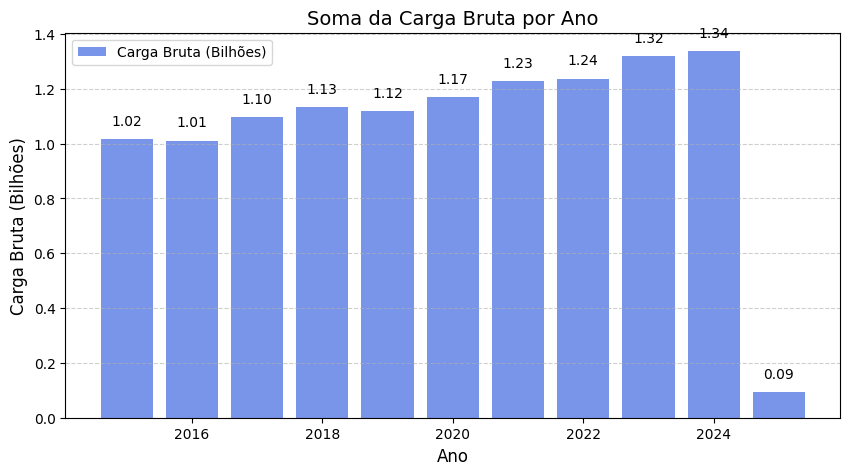

In [6]:
plt.figure(figsize=(10, 5))
plt.bar(df_resultados['Ano'], df_resultados['Soma'] / 1e9, color='royalblue', alpha=0.7, label='Carga Bruta (Bilhões)')

plt.title('Soma da Carga Bruta por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Carga Bruta (Bilhões)', fontsize=12)

for i, v in enumerate(df_resultados['Soma'] / 1e9):  # Normaliza os alores para bilhoes, para não ficar zuado
    plt.text(df_resultados['Ano'][i], v + 0.05, f'{v:.2f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [ ]:
df_resultados.to_csv('/content/soma_do_vlr_cargas.csv', index=False)
from google.colab import files
files.download('/content/soma_do_vlr_cargas.csv')


In [7]:
dados_carga[2022]

,IDCarga,IDAtracacao,Origem,Destino,CDMercadoria,Tipo Operação da Carga,Carga Geral Acondicionamento,ConteinerEstado,Tipo Navegação,FlagAutorizacao,...,Percurso Transporte em vias Interiores,Percurso Transporte Interiores,STNaturezaCarga,STSH2,STSH4,Natureza da Carga,Sentido,TEU,QTCarga,VLPesoCargaBruta
0,30392657,1207135,BRPA214,BRBEL,2710,Interior,NaN,NaN,Interior,S,...,Interior Estadual,Navegação Interior,Exclusivo,Exclusivo,Exclusivo,Granel Líquido e Gasoso,Desembarcados,0.0,0,1296.67
1,30392680,1207163,BRBEL,BRBEL,CA01,Apoio,NaN,NaN,Apoio Portuário,S,...,NaN,NaN,Exclusivo,Compartilhado,Compartilhado,Granel Líquido e Gasoso,Embarcados,0.0,0,99.04
2,30392681,1207163,BRSSA,BRBEL,2710,Cabotagem,NaN,NaN,Cabotagem,S,...,NaN,Cabotagem em vias interiores,Exclusivo,Compartilhado,Compartilhado,Granel Líquido e Gasoso,Desembarcados,0.0,0,7533.82
3,30392684,1207166,BRMAO,BRSTM,8711,Interior,Solta,NaN,Interior,S,...,Interior Interestadual,Navegação Interior,Exclusivo,Compartilhado,Compartilhado,Carga Geral,Desembarcados,0.0,8,1.20
4,30392685,1207166,BRMAO,BRSTM,4202,Interior,Solta,NaN,Interior,S,...,Interior Interestadual,Navegação Interior,Exclusivo,Compartilhado,Compartilhado,Carga Geral,Desembarcados,0.0,1750,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280012,3449,3449,BRQGA,BR375,2505,Interior,NaN,NaN,Interior,N,...,Interior Estadual,Navegação Interior,Compartilhado,Compartilhado,Compartilhado,Granel Sólido,Desembarcados,0.0,0,11197.00
2280013,3450,3450,BRQGA,BR375,2505,Interior,NaN,NaN,Interior,N,...,Interior Estadual,Navegação Interior,Compartilhado,Compartilhado,Compartilhado,Granel Sólido,Desembarcados,0.0,0,13000.00
2280014,3451,3451,BRISA,BR289,2505,Interior,NaN,NaN,Interior,N,...,Interior Estadual,Navegação Interior,Compartilhado,Compartilhado,Compartilhado,Granel Sólido,Desembarcados,0.0,0,2584.00
2280015,3452,3452,BRISA,BR289,2505,Interior,NaN,NaN,Interior,N,...,Interior Estadual,Navegação Interior,Compartilhado,Compartilhado,Compartilhado,Granel Sólido,Desembarcados,0.0,0,2584.00


In [8]:
dados_atracacao = {}
for ano in range(2015, 2026):
    arquivo = caminho_in + f"{ano}Atracacao.txt"
    df = pd.read_csv(arquivo, low_memory=False, sep=';', encoding='UTF-8', decimal=',')
    dados_atracacao[ano] = df

In [9]:
dados_atracacao[2021].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79238 entries, 0 to 79237
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   IDAtracacao                     79238 non-null  int64  
 1   CDTUP                           79238 non-null  object 
 2   IDBerco                         79107 non-null  object 
 3   Berço                           79104 non-null  object 
 4   Porto Atracação                 79107 non-null  object 
 5   Coordenadas                     79107 non-null  object 
 6   Apelido Instalação Portuária    27799 non-null  object 
 7   Complexo Portuário              79238 non-null  object 
 8   Tipo da Autoridade Portuária    79238 non-null  object 
 9   Data Atracação                  79107 non-null  object 
 10  Data Chegada                    79107 non-null  object 
 11  Data Desatracação               79238 non-null  object 
 12  Data Início Operação            

In [10]:
dados_atracacao[2021]

,IDAtracacao,CDTUP,IDBerco,Berço,Porto Atracação,Coordenadas,Apelido Instalação Portuária,Complexo Portuário,Tipo da Autoridade Portuária,Data Atracação,...,FlagMCOperacaoAtracacao,Terminal,Município,UF,SGUF,Região Geográfica,Região Hidrográfica,Instalação Portuária em Rio,Nº da Capitania,Nº do IMO
0,1206398,BRMCZ,MCZ0005,Berço 5,Maceió,"-35.726388,-9.683056000000001",NaN,Maceió,Porto Organizado,10/12/2021 16:30:00,...,1,Cais do AA-12,Maceió,Alagoas,AL,Nordeste,NaN,Não,NaN,NaN
1,1176757,BRREC,RECA-05,RECA-05,Recife,"-34.868332,-8.053888000000001",Arrecife dos Navios,Suape - Recife,Porto Organizado,19/07/2021 08:15:00,...,1,Cais Público,Recife,Pernambuco,PE,Nordeste,NaN,Não,NaN,NaN
2,1168176,BRREC,RECA-05,RECA-05,Recife,"-34.868332,-8.053888000000001",Arrecife dos Navios,Suape - Recife,Porto Organizado,18/06/2021 09:50:00,...,1,Cais Público,Recife,Pernambuco,PE,Nordeste,NaN,Não,NaN,NaN
3,1138950,BRITJ,ITJ0991,NaN,Itajaí,"-48.666389,-26.90083200000001",NaN,Itajaí,Porto Organizado,26/01/2021 12:00:00,...,1,NaN,NaN,NaN,NaN,NaN,NaN,Não,NaN,NaN
4,1200409,BRSTM,STM0501,101,Santarém,"-54.737499,-2.415",NaN,Santarém,Porto Organizado,19/11/2021 21:47:00,...,1,Cais Público,Santarém,Pará,PA,Norte,Amazônica,Sim,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79233,1411454,BRRO009,BRRO0095002,TEVEL II,TEVEL,"-63.919,-8.73035",NaN,Porto Velho,Terminal Autorizado,16/11/2021 21:00:00,...,1,TEVEL,Porto Velho,Rondônia,RO,Norte,Amazônica,Sim,0011453168,NaN
79234,1410919,BRRO009,BRRO0095001,TEVEL I,TEVEL,"-63.919,-8.73035",NaN,Porto Velho,Terminal Autorizado,22/09/2021 19:45:00,...,1,TEVEL,Porto Velho,Rondônia,RO,Norte,Amazônica,Sim,0011453168,NaN
79235,1383413,BRSC007,BRSC0070101,MONOBÓIA-SBM II,Terminal Aquaviário de São Francisco do Sul,"-48.5299,-26.2279",TEFRAN,São Francisco do Sul,Terminal Autorizado,17/02/2021 08:30:00,...,1,Terminal Aquaviário de São Francisco do Sul,São Francisco do Sul,Santa Catarina,SC,Sul,NaN,Não,NaN,9743203.0
79236,1383529,BRSC007,BRSC0070101,MONOBÓIA-SBM II,Terminal Aquaviário de São Francisco do Sul,"-48.5299,-26.2279",TEFRAN,São Francisco do Sul,Terminal Autorizado,24/05/2021 08:48:00,...,1,Terminal Aquaviário de São Francisco do Sul,São Francisco do Sul,Santa Catarina,SC,Sul,NaN,Não,NaN,9802152.0


In [13]:
df_resultados = []

for ano in range(2015, 2026):
    df_carga = dados_carga[ano]
    df_atracacao = dados_atracacao[ano]

    # Faz a fusão dos DataFrames usando IDAtracacao como chave (fusão a função Merge)
    df_merged = df_carga.merge(df_atracacao, on='IDAtracacao', how='inner') #how="iiner" é a junção padrão

    # Agrupa por porto (groupby) e soma os valores da carga bruta (.sum)
    df_portos = df_merged.groupby('Porto Atracação', as_index=False)['VLPesoCargaBruta'].sum()
    df_portos['Ano'] = ano
    df_resultados.append(df_portos)

# Concatena os resultados de todos os anos
df_final = pd.concat(df_resultados, ignore_index=True)

# Ordena os portos pelo valor total de carga exportada
df_final = df_final.sort_values(by=['Ano', 'VLPesoCargaBruta'], ascending=[True, False])

# Remove colunas desnecessárias, mantendo apenas Porto, Ano e Valor Exportado
df_final = df_final[['Porto Atracação', 'Ano', 'VLPesoCargaBruta']]

# Obtém os dados de UF e Município a partir de dados_atracacao[2021]
#df_atracacao_2021 = dados_atracacao[2021][['Porto Atracação', 'SGUF', 'Município']].drop_duplicates()

# Verifica se o valor de coordenadas não é NaN e se é uma string antes de tentar dividir
'''def separar_coordenadas(coordenadas):
    if pd.isna(coordenadas):  # Verifica se a coordenada é NaN
        return None, None
    coordenadas = str(coordenadas)
    lat, lon = coordenadas.split(',')
    return float(lat), float(lon)
'''
# Aplica a função para separar as coordenadas
#df_atracacao_2021[['Latitude', 'Longitude']] = df_atracacao_2021['Coordenadas'].apply(separar_coordenadas).apply(pd.Series)
df_final = df_final.merge(df_atracacao_2021, on='Porto Atracação', how='left')
print(df_final)
df_final.to_csv('ranking_portos_exportacao.csv', index=False)


                                  Porto Atracação   Ano  VLPesoCargaBruta  \
0           Terminal Marítimo de Ponta da Madeira  2015      1.246023e+08   
1                             Terminal de Tubarão  2015      1.136570e+08   
2                                          Santos  2015      1.032511e+08   
3                                          Santos  2015      1.032511e+08   
4                                         Itaguaí  2015      5.735468e+07   
...                                           ...   ...               ...   
2049  Base de Distribuição Secundária de Itaituba  2025      5.004490e+02   
2050                       Terminal Nov Flexibles  2025      2.725070e+02   
2051                                Terminal Dome  2025      2.630000e+02   
2052                           Terminal Navecunha  2025      6.370000e+01   
2053                              Ipiranga Manaus  2025      8.441000e+00   

     SGUF          Município  
0      MA           São Luís  
1      ES    

In [ ]:
# Exportação de ranking dos portos
df_final.to_csv('/content/ranking_portos.csv', index=False)
from google.colab import files
files.download('/content/ranking_portos.csv')